In [14]:
import cv2
import matplotlib.pyplot as plt
from torch.nn.functional import threshold
import numpy as np

In [3]:
def show(name , i , Title):
    plt.subplot( 2, 4 ,i)
    plt.imshow(name, cmap='gray')
    plt.title(Title)
    plt.axis('off')

In [15]:

    cap = cv2.VideoCapture(0)
    ret, frame = cap.read()
    cap.release()
    frame_org = frame
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)


In [11]:
threshold_image = cv2.threshold(frame, 127, 255, cv2.THRESH_BINARY)[1]

In [12]:
threshold_image_16 = (frame // 16) * 16


In [13]:
# Apply Sobel filters
sobel_x = cv2.Sobel(frame, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(frame, cv2.CV_64F, 0, 1, ksize=3)
sobel_magnitude = cv2.magnitude(sobel_x, sobel_y)
sobel_magnitude = cv2.convertScaleAbs(sobel_magnitude)

In [16]:
#canny filter
canny_image =cv2.Canny(frame, 100, 200)

In [17]:
#guassian blur
kernel = cv2.getGaussianKernel(5, sigma=-1)
gaussian = np.outer(kernel, kernel)
blurred = cv2.filter2D(frame, -1, gaussian)

In [18]:
#sharpening
sharpening_kernel = np.array([[0, -1, 0],
                                  [-1, 5, -1],
                                  [0, -1, 0]])
sharpened_image = cv2.filter2D(blurred , -1, sharpening_kernel)

In [19]:
#RGB to BGR
bgr_image = cv2.cvtColor(frame_org, cv2.COLOR_RGB2BGR)

In [24]:
titles = ['Original Image', 'Grayscale', 'Thresholded', '16 Grays',
              'Sobel Edge', 'Canny Edge', 'Gaussian', 'Sharpened']

images = [frame_org,frame,threshold_image,threshold_image_16,sobel_magnitude,canny_image,blurred,sharpened_image]

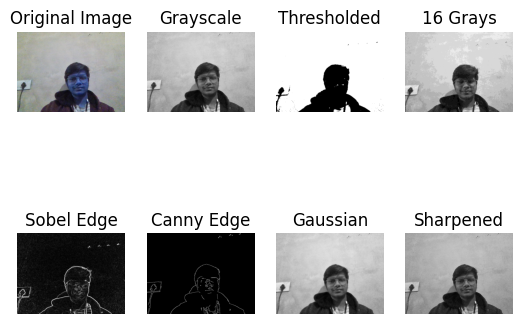

In [25]:
for i in range(8):
    show(images[i], i+1, titles[i])